# <center>Práctica 1</center>
** <center>Introducción al Procesamiento de Imágenes en el dominio espacial</center> **
** <center>Curso 2016 - 2017</center> **

### I. Lectura, visualización y almacenamiento de imágenes 

Lectura de imágenes usando el comando Imread en el siguiente link se puede encontrar información sobre esta función: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html

Hay que asegurarse de que la imagen que se quiere leer se encuentre en el directorio correcto, si no es el caso python no da error, si no que guarda una matriz nula

In [13]:
#importamos librerías necesarias
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgcolor = cv2.imread('lena.jpg') #no necesitamos 2º argumento ya que color es el que está por defecto
imggris = cv2.imread('lena.jpg',0) #carga la imagen en grises 2º argumento indica grises

print(imggris)

[[187 196 187 ... 144 147 149]
 [188 193 188 ... 146 144 144]
 [190 189 190 ... 146 145 144]
 ...
 [163 164 170 ...  71  70  73]
 [159 164 168 ...  69  68  74]
 [152 163 167 ...  72  71  81]]


¿qué dimensión tiene la variable asociada a cada una de las imágenes? Utilice los comandos shape y size para obtener la anchura y altura de la imagen (medidas en píxeles) y el número total de píxeles. También podemos averiguar el tipo de imagen usando dtype.

In [14]:
# image shape dice nº de columnas, filas y canales
print('shape:')
print(imgcolor.shape)
print(imggris.shape)

# size devuelve píxeles
print('size:')
print(imgcolor.size)
print(imggris.size)

# dtypee devuelve píxeles
print('type:')
print(imgcolor.dtype)
print(imggris.dtype)

shape:
(512, 512, 3)
(512, 512)
size:
786432
262144
type:
uint8
uint8


Para visualizar la imagen tenemos dos opciones: imshow de OpenCv y la equivalente en matplotlib.
La versión de openCV abre la imagen en una ventana separada y requiere la función waitKey para funcionar. Para cerrar las ventanas creadas se usa la función destroyAllWindows

In [15]:
#OpenCV

cv2.imshow('image',imgcolor)
cv2.waitKey(0)
cv2.destroyAllWindows()


Otra forma de representar es con matplotlib, esta librería también tiene una función imshow (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html).


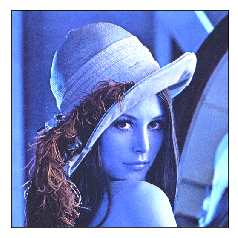

In [16]:
#mostrar imagen en el cuadernillo
plt.imshow(imgcolor)
plt.xticks([]), plt.yticks([])  # esconde los ejes del plot
plt.show()

Encontramos un problema en el caso anterior, la imagen mostrada no es correcta, OpenCV lee imágenes como BGR mientras que matplotlib interpreta RGB, si queremos ver la imagen en color correctamente tendremos que modificar la matriz de imagen, esto se hará en el siguiente apartado.

#### Algunas funciones de conversión de tipos de imágenes
OpenCV tiene una funcion que permite cambiar el espacio de color de la imagen con la que estamos trabajando, se trata de la función **cvtcolor** que tiene una gran cantidad de opciones de conversión.

In [17]:
flags = flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

print(flags)

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

Por ejemplo con el caso del apartado anterior tenemos la imagen en GBR y matplotlib representa RGB, podemos hacer esta transformación:

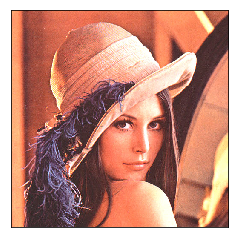

In [18]:
imgRGB = cv2.cvtColor(imgcolor, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.xticks([]), plt.yticks([])  # esconde los ejes del plot
plt.show()

**Transformar una imagen de color a grises y después a binaria**
para pasar una imagen a grises podemos usar el propio lector de imágenes como hicimos en el primer apartado que guarda la imagen directamente a gris, otra opción es usar cvtcolor con el argumemto COLOR_RGB2GRAY para pasar de gris a binaria usamos la función Threshold (https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#cv2.threshold)


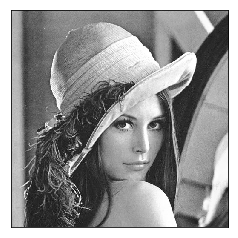

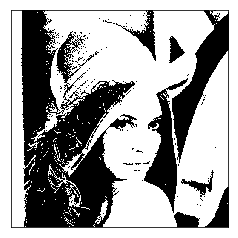

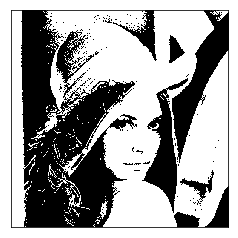

132.0


In [19]:
imggray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
plt.imshow(imggray, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

#[thresh, imgbi] = cv2.threshold(imggris, 127, 1, cv2.THRESH_BINARY)
[thresh, imgbi] = cv2.threshold(imggris, 127, 255, cv2.THRESH_BINARY)
plt.imshow(imgbi, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

[thresh, imgotsu] = cv2.threshold(imggris, 127, 255, cv2.THRESH_OTSU)
plt.imshow(imgotsu, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(thresh)

Una imagen binaria pasa a ser RGB. Construya manualmente el mapa de color, de modo que los píxeles blancos de la imagen binaria (denominados píxeles de primer plano)tengan color rojo, y los píxeles oscuros de la imagen binaria tengan color amarillo. Páginas de información sobre mapas de color:
https://matplotlib.org/api/_as_gen/matplotlib.colors.Colormap.html#matplotlib.colors.Colormap
https://matplotlib.org/tutorials/colors/colormap-manipulation.html
Función para crear un mapa de color: https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html#matplotlib.colors.ListedColormap

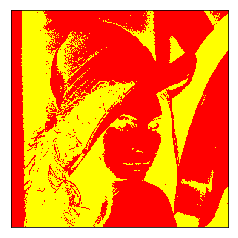

In [20]:
from matplotlib import colors as mpc
color = [[1, 1, 0],
       [1, 0, 0]]

newcmp = mpc.ListedColormap(color)
plt.imshow(imgbi, cmap = newcmp)
plt.xticks([]), plt.yticks([])
plt.show()

**Una imagen RGB pase a una imagen indexada con 255 niveles.**

**Una imagen RGB pase a indexada con 5 niveles.**

**Una imagen de grises pase a imagen indexada con 5 niveles.**

Las imágenes procesadas con OpenCV se pueden almacenar en disco utilizando el comando
imwrite. 

In [21]:
cv2.imwrite('lenagray.png',imggray)
cv2.imwrite('lenabinary.png', imgbi)

plt.imsave('lenaind.png', imgbi, cmap = newcmp)
#imgind = cv2.imread('cutieind.jpg')


**II. Modificación de la resolución espacial y en intensidad **

Para modificar la resolución espacial de una imagen usaremos la función imresize, cuyos parámetros se pueden ver en el siguiente link: https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#void%20resize(InputArray%20src,%20OutputArray%20dst,%20Size%20dsize,%20double%20fx,%20double%20fy,%20int%20interpolation)

**III. Histograma y mejora de contraste**
https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

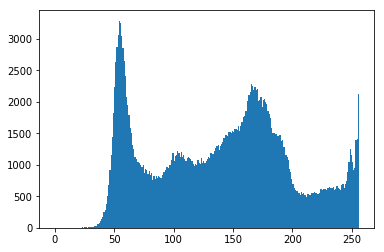

In [22]:
plt.hist(imggris.ravel(),256,[0,256]); plt.show()